In [1]:
!ls ../data/

baboonColor.png  bird.jpg  flower.jpg


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import floor,ceil


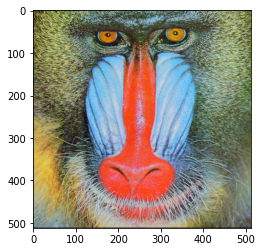

In [3]:
input_image = cv2.imread("../data/baboonColor.png")
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(input_image)

In [8]:
r,c,d = input_image.shape
numPixels = r*c
resizedImg = cv2.resize(input_image,(64,64))
outputImg = np.zeros_like(resizedImg)

row,col,d = outputImg.shape

h = 10
th = 0.1
k = 5

for i in range(row):
    for j in range(col):
        iterator = 0
        red = resizedImg[i,j,0].astype(float)
        green = resizedImg[i,j,1].astype(float)
        blue = resizedImg[i,j,2].astype(float)
        
        meanVal = [i,j,red,green,blue]
        while iterator<k:
            num = np.array([0]*5)
            den = 0
            for i1 in range(row):
                for j1 in range(col):
                    r = resizedImg[i1,j1,0].astype(float)
                    g = resizedImg[i1,j1,1].astype(float)
                    b = resizedImg[i1,j1,2].astype(float)
                    im = meanVal[0]
                    jm = meanVal[1]
                    rm = meanVal[2]
                    gm = meanVal[3]
                    bm = meanVal[4]
                    reserve = list(map(float,[i1, j1, r, g, b]))
                    weight = np.exp(-1 * ((im - i1)**2 + (jm - j1)**2 + (rm - r)**2 + (gm - g)**2 + (bm - b)**2)/(h**2))
                    for i in range(len(num)):
                        num[i] += weight*reserve[i]
                    den = den + weight
#             i1 = np.array(list(range(1,row+1)))
#             j1 = np.array(list(range(1,col+1)))
#             num = np.zeros(5,)
#             den = np.zeros(5,)
#             r = resizedImg[:,:,0]
#             g = resizedImg[:,:,1]
#             b = resizedImg[:,:,2]
#             im = i
#             jm = j
#             rm = red
#             gm = green
#             bm = blue
#             weight = np.exp(-(np.square(im - i1) + np.square(jm - j1) + np.square(rm - r) + np.square(gm - g) + np.square(bm - b))/(h**2))

            meanNew = num / den
            meanShift = meanNew - meanVal
            meanShiftnorm = np.linalg.norm(meanShift)
            if meanShiftnorm >= th:
                meanVal = meanNew
                iterator += 1
            else:
                break
        
    outputImg[i,j,:3] = meanVal[-3:]

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
255


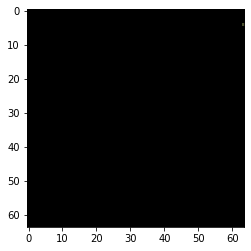

In [17]:
plt.imshow(outputImg)
print(outputImg/np.max(outputImg))
print(np.max(input_image))